## Entrainement du modèle

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
train_gen = train_datagen.flow_from_directory(
    'train', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical', 
    seed = 42
)

Found 13920 images belonging to 120 classes.


In [12]:
val_gen = val_datagen.flow_from_directory(
    'test', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical',
    seed = 42
)

Found 3480 images belonging to 120 classes.


In [13]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='train', target_size=(224,224), class_mode='categorical', batch_size=10)

Found 13920 images belonging to 120 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

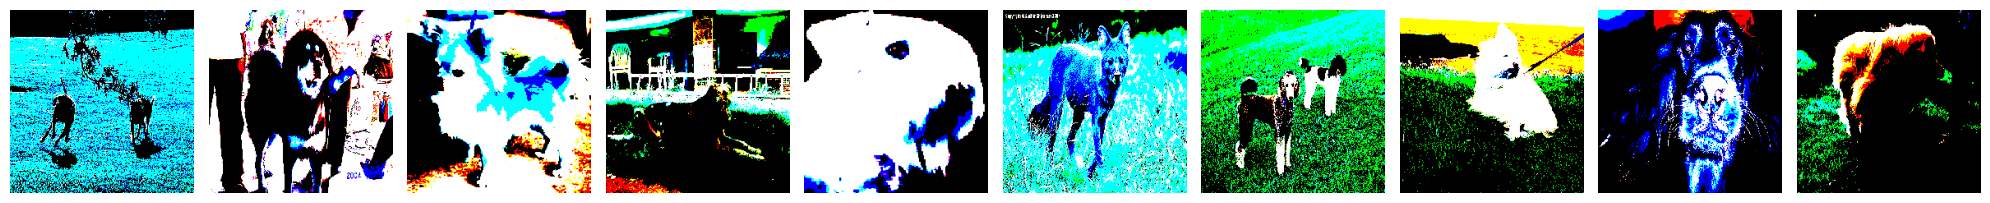

In [14]:
imgs, labels = next(train_batches)

fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 256)       2951

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [17]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10


KeyboardInterrupt: 

In [8]:
def diagnostic_learning_curves(): 
    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')

    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

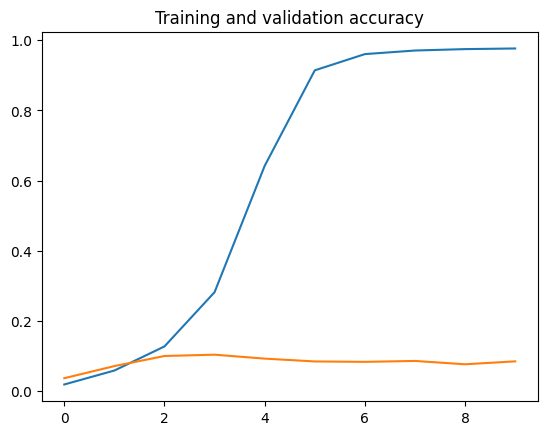

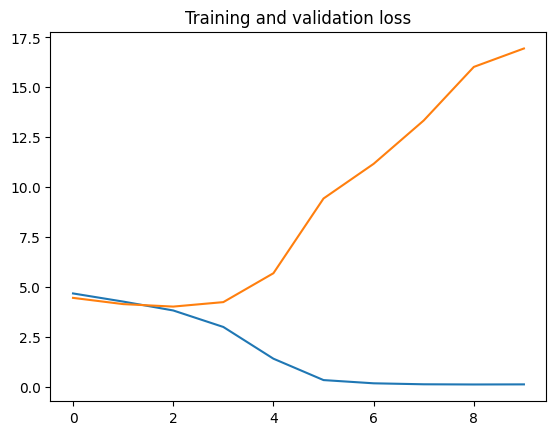

In [ ]:
diagnostic_learning_curves()

### Le modèle est overfit, il a de très bon résultats sur les données d'entrainement et de très mauvais sur les données de test, on va utilisé la méthode d'augmentation des données pour contrer ça

## Data augmentation

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "train", 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 13920 images belonging to 120 classes.
Found 3480 images belonging to 120 classes.


In [7]:

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       2951

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

Epoch 1/10
708/708 [==============================] - 575s 809ms/step - loss: 4.7906 - acc: 0.0104 - val_loss: 4.6381 - val_acc: 0.0217
Epoch 2/10
708/708 [==============================] - 545s 770ms/step - loss: 4.6017 - acc: 0.0201 - val_loss: 4.4496 - val_acc: 0.0344
Epoch 3/10
708/708 [==============================] - 551s 778ms/step - loss: 4.4610 - acc: 0.0335 - val_loss: 4.4077 - val_acc: 0.0422
Epoch 4/10
708/708 [==============================] - 548s 774ms/step - loss: 4.3414 - acc: 0.0496 - val_loss: 4.2640 - val_acc: 0.0558
Epoch 5/10
708/708 [==============================] - 556s 784ms/step - loss: 4.2523 - acc: 0.0569 - val_loss: 4.0892 - val_acc: 0.0719
Epoch 6/10
708/708 [==============================] - 565s 797ms/step - loss: 4.1736 - acc: 0.0684 - val_loss: 3.9762 - val_acc: 0.0903
Epoch 7/10
708/708 [==============================] - 693s 978ms/step - loss: 4.0995 - acc: 0.0773 - val_loss: 3.9801 - val_acc: 0.0883
Epoch 8/10
708/708 [============================

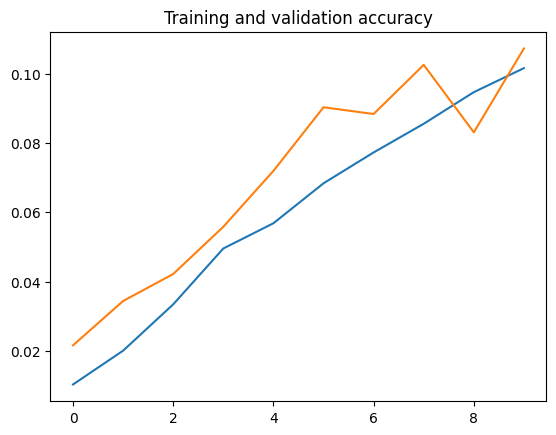

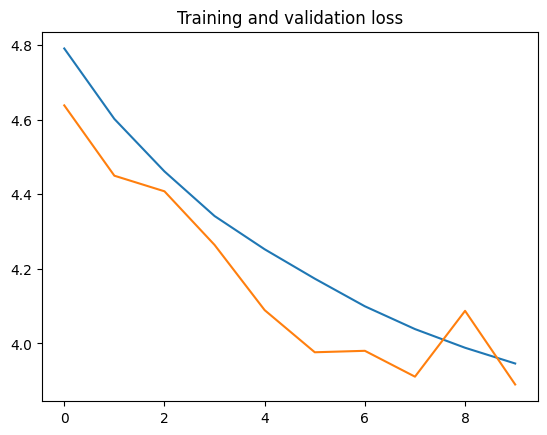

In [ ]:
diagnostic_learning_curves()

## Amélioration du modèle

L'overfiting à été résolu mais la précision est très mauvaise, nous allons donc ajouter des neuronnes aux couches et des itérations à l'entrainement pour compléxifier le modèle et améliorer la précision.

In [26]:

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 512)       1180

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [28]:
history = model.fit(
      train_generator,
      epochs=24,
      validation_data=validation_generator,
      )

Epoch 1/24
696/696 [==============================] - 1722s 2s/step - loss: 4.7812 - acc: 0.0111 - val_loss: 4.5610 - val_acc: 0.0233
Epoch 2/24
696/696 [==============================] - 1718s 2s/step - loss: 4.5481 - acc: 0.0282 - val_loss: 4.4146 - val_acc: 0.0362
Epoch 3/24
696/696 [==============================] - 1709s 2s/step - loss: 4.4408 - acc: 0.0390 - val_loss: 4.2953 - val_acc: 0.0534
Epoch 4/24
696/696 [==============================] - 1705s 2s/step - loss: 4.3199 - acc: 0.0527 - val_loss: 4.1652 - val_acc: 0.0681
Epoch 5/24
696/696 [==============================] - 1712s 2s/step - loss: 4.2275 - acc: 0.0621 - val_loss: 4.0505 - val_acc: 0.0805
Epoch 6/24
696/696 [==============================] - 1713s 2s/step - loss: 4.1540 - acc: 0.0739 - val_loss: 4.0341 - val_acc: 0.0816
Epoch 7/24
696/696 [==============================] - 1708s 2s/step - loss: 4.0829 - acc: 0.0787 - val_loss: 4.1104 - val_acc: 0.0802
Epoch 8/24
696/696 [==============================] - 1713s 2s

KeyboardInterrupt: 

Le model à une très mauvaise précision même après avoir compléxifié sa structure 

## Réduction de la transformation des images lors de l'augmentation des donées

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "train", 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 13920 images belonging to 120 classes.
Found 3480 images belonging to 120 classes.


In [4]:

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       2951

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [6]:
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      )

Epoch 1/15


696/696 [==============================] - 543s 776ms/step - loss: 4.7473 - acc: 0.0130 - val_loss: 4.5469 - val_acc: 0.0287
Epoch 2/15
696/696 [==============================] - 536s 769ms/step - loss: 4.4288 - acc: 0.0354 - val_loss: 4.3021 - val_acc: 0.0497
Epoch 3/15
696/696 [==============================] - 528s 758ms/step - loss: 4.2077 - acc: 0.0599 - val_loss: 4.0900 - val_acc: 0.0721
Epoch 4/15
696/696 [==============================] - 540s 775ms/step - loss: 4.0613 - acc: 0.0807 - val_loss: 4.0485 - val_acc: 0.0750
Epoch 5/15
696/696 [==============================] - 535s 768ms/step - loss: 3.9501 - acc: 0.1018 - val_loss: 3.9777 - val_acc: 0.0951
Epoch 6/15
696/696 [==============================] - 620s 890ms/step - loss: 3.8382 - acc: 0.1178 - val_loss: 3.8253 - val_acc: 0.1040
Epoch 7/15
696/696 [==============================] - 532s 764ms/step - loss: 3.7275 - acc: 0.1334 - val_loss: 3.9487 - val_acc: 0.1034
Epoch 8/15
696/696 [==========================

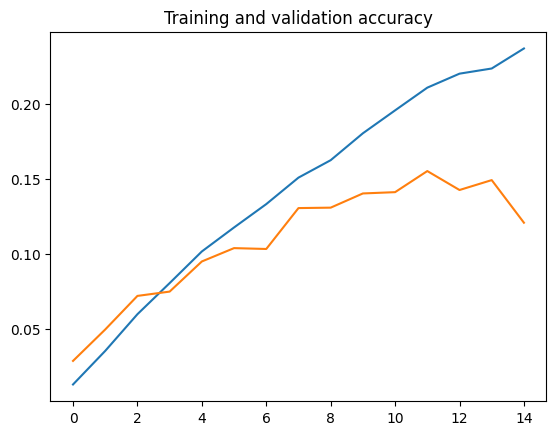

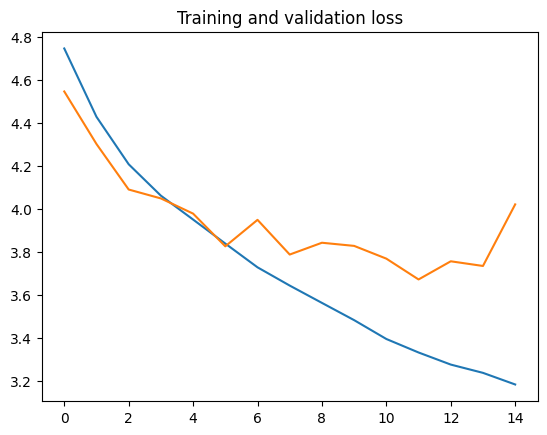

In [9]:
diagnostic_learning_curves()

## Sauvegarde du modèle

In [10]:
from keras.models import load_model

model.save('model2.h5')


c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
model.save('model2', save_format='tf')


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets
